In [ ]:
# %pip install tensorflow
# %pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python import pywrap_tensorflow

In [12]:
import os 
print ("current Dir ", os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir, "Datasets", "Train")
test_path = os.path.join(curr_dir, "Datasets", "Test")
valid_path = os.path.join(curr_dir, "Datasets", "Valid")

current Dir  c:\Potato_Disease_Project1


In [13]:
training_set = tf.keras.utils.image_dataset_from_directory (
    train_path,
    labels = "inferred",
    label_mode = "categorical",
    color_mode = "rgb",
    image_size = (128, 128),
    shuffle = True,
    interpolation = "bilinear",
)

Found 900 files belonging to 3 classes.


In [14]:
labels = training_set.class_names
print(labels)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [15]:
validation_set = tf.keras.utils.image_dataset_from_directory (
    valid_path,
    labels = "inferred",
    label_mode = "categorical",
    color_mode = "rgb",
    image_size = (128, 128),
    shuffle = True,
    interpolation = "bilinear",
)

Found 300 files belonging to 3 classes.


In [16]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D (filters = 32, kernel_size = 3, padding = 'same', activation ='relu', input_shape = [128,128,3] ))
cnn.add(tf.keras.layers.Conv2D (filters = 32, kernel_size = 3, activation ='relu'))
cnn.add(tf.keras.layers.MaxPool2D (pool_size = 2, strides = 2))

cnn.add(tf.keras.layers.Conv2D (filters = 64, kernel_size = 3, padding = 'same', activation ='relu'))
cnn.add(tf.keras.layers.Conv2D (filters = 64, kernel_size = 3, activation ='relu'))
cnn.add(tf.keras.layers.MaxPool2D (pool_size = 2, strides = 2))

cnn.add(tf.keras.layers.Conv2D (filters = 128, kernel_size = 3, padding = 'same', activation ='relu'))
cnn.add(tf.keras.layers.Conv2D (filters = 128, kernel_size = 3, activation ='relu'))
cnn.add(tf.keras.layers.MaxPool2D (pool_size = 2, strides = 2))

cnn.add(tf.keras.layers.Conv2D (filters = 256, kernel_size = 3, padding = 'same', activation ='relu'))
cnn.add(tf.keras.layers.Conv2D (filters = 256, kernel_size = 3, activation ='relu'))
cnn.add(tf.keras.layers.MaxPool2D (pool_size = 2, strides = 2))

cnn.add(tf.keras.layers.Conv2D (filters = 512, kernel_size = 3, padding = 'same', activation ='relu'))
cnn.add(tf.keras.layers.Conv2D (filters = 512, kernel_size = 3, activation ='relu'))
cnn.add(tf.keras.layers.MaxPool2D (pool_size = 2, strides = 2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten()) # Flatten convertes 3 dimentional img to 1 dimentional img
cnn.add(tf.keras.layers.Dense (units = 1500, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense (units = 3, activation = 'softmax'))


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
cnn.compile(optimizer = tf.keras.optimizers.Adam(
    learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
training_history = cnn.fit(x = training_set, validation_data = validation_set, epochs = 10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.4158 - loss: 1.2207 - val_accuracy: 0.6267 - val_loss: 0.7238
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 94s 3s/step - accuracy: 0.6485 - loss: 0.7666 - val_accuracy: 0.7400 - val_loss: 0.5943
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.7788 - loss: 0.4870 - val_accuracy: 0.8000 - val_loss: 0.4378
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.8573 - loss: 0.3691 - val_accuracy: 0.9067 - val_loss: 0.2409
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.9152 - loss: 0.2369 - val_accuracy: 0.9000 - val_loss: 0.3217
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.8867 - loss: 0.2660 - val_accuracy: 0.9133 - val_loss: 0.2009
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.9640 - loss: 0.1087 - val_accuracy: 0.9000 - val_loss: 0.2206
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9484 - loss: 0.1330 - val_accuracy: 0.9000 - val_los

In [20]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 28s 955ms/step - accuracy: 0.9884 - loss: 0.0381
Training accuracy: 0.9911110997200012


In [21]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9646 - loss: 0.0964
validation accuracy: 0.9566666483879089


In [22]:
cnn.save('trained_plant_disease_model.keras')

In [23]:
training_history.history

{'accuracy': [0.5,
  0.6466666460037231,
  0.7955555319786072,
  0.8677777647972107,
  0.9233333468437195,
  0.9055555462837219,
  0.9644444584846497,
  0.9566666483879089,
  0.9577777981758118,
  0.9822221994400024],
 'loss': [1.0581963062286377,
  0.7444067001342773,
  0.45903903245925903,
  0.33271434903144836,
  0.20717686414718628,
  0.2312384694814682,
  0.10426782071590424,
  0.11693473905324936,
  0.10142038017511368,
  0.05311638116836548],
 'val_accuracy': [0.6266666650772095,
  0.7400000095367432,
  0.800000011920929,
  0.9066666960716248,
  0.8999999761581421,
  0.9133333563804626,
  0.8999999761581421,
  0.8999999761581421,
  0.9466666579246521,
  0.9566666483879089],
 'val_loss': [0.7238081693649292,
  0.594322919845581,
  0.4377514123916626,
  0.24087437987327576,
  0.32167091965675354,
  0.20086364448070526,
  0.22056658565998077,
  0.25084608793258667,
  0.15298497676849365,
  0.10505586862564087]}

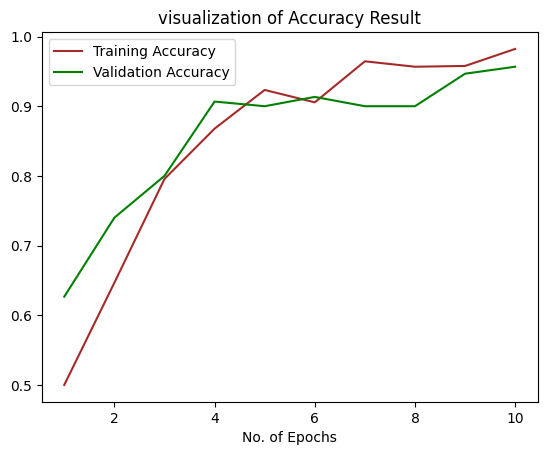

In [24]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color = 'brown', label = 'Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color = 'green', label = 'Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('visualization of Accuracy Result')
plt.legend()
plt.show()